## Importando base de dados

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
dataBase = pd.read_csv("./tips.csv")
dataBase.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

#### Tradução das colunas

In [131]:
dataBase.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [132]:
renamer = {'total_bill': 'valor_conta'
           ,'tip':'gorjeta'
           ,'dessert':'sobremesa'
           ,'day':'dia_semana'
           ,'time':"hora_do_dia"
           ,'size':'total_pessoas'}

In [133]:
new_data = dataBase.rename(columns=renamer)

In [134]:
new_data.head(2)

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


#### Tradução das linhas

In [135]:
new_data['sobremesa'].replace({'No': 'Não','Yes':'Sim'}, inplace=True)
new_data.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [136]:
new_data['dia_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [137]:
new_data['dia_semana'].replace({'Sun':'Domingo', 'Sat':'Sabado', 'Thur':'Quinta', 'Fri':'Sexta'}, inplace=True)

In [138]:
new_data.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [139]:
new_data['hora_do_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [140]:
new_data['hora_do_dia'].replace({'Dinner':'Jantar', 'Lunch':'Almoço'}, inplace=True)

In [141]:
new_data.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## 1º Análise - Valor da conta e gorjeta

In [142]:
new_data.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'hora_do_dia',
       'total_pessoas'],
      dtype='object')

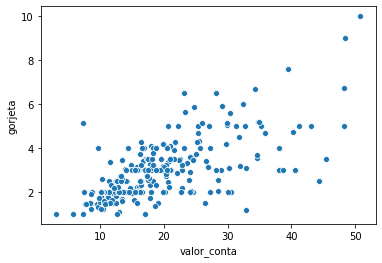

In [143]:
Valor_Gorjeta = sns.scatterplot(x=new_data.valor_conta, y=new_data.gorjeta)

**Visualmente o valor da gorjeta, aumenta de acordo com o valor da conta**

In [144]:
print(f'A base contém {new_data.shape[0]} valores.\n')
print('A base não contém valores nullos.')
new_data.isna().sum()

A base contém 244 valores.

A base não contém valores nullos.


valor_conta      0
gorjeta          0
sobremesa        0
dia_semana       0
hora_do_dia      0
total_pessoas    0
dtype: int64

## Criando o campo porcentagem

In [145]:
new_data['porcentagem'] = (new_data['gorjeta'] / new_data['valor_conta']).round(2)

In [146]:
new_data.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


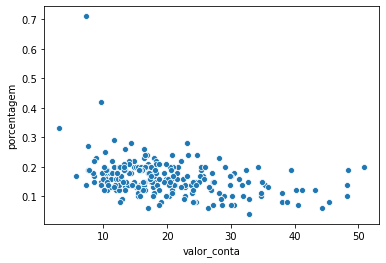

In [147]:
porcentagem = sns.scatterplot(x='valor_conta', y='porcentagem', data=new_data)

**Visualmente, o valor da conta não é proporcional ao mesmo valor da gorjeta**

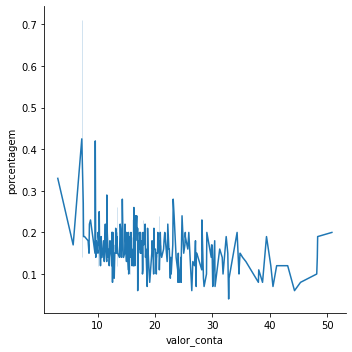

In [148]:
porcentagem_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=new_data)

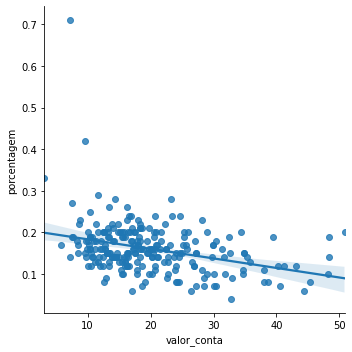

In [149]:
sns.lmplot(x='valor_conta', y='porcentagem', data=new_data)

## 2º Análise - Sobremesa

In [150]:
new_data.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [151]:
new_data[new_data['sobremesa'] == 'Sim'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [152]:
new_data[new_data['sobremesa'] == 'Não'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


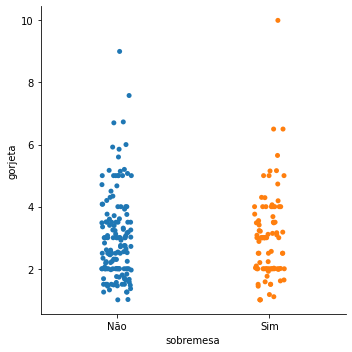

In [153]:
sns.catplot(x='sobremesa', y='gorjeta', data=new_data)

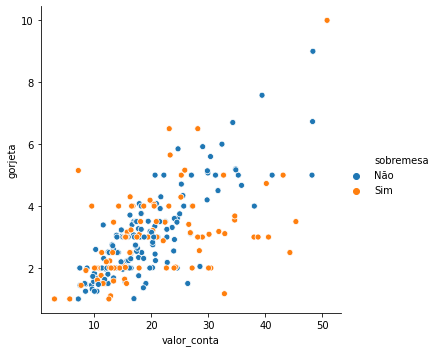

In [154]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', data=new_data)

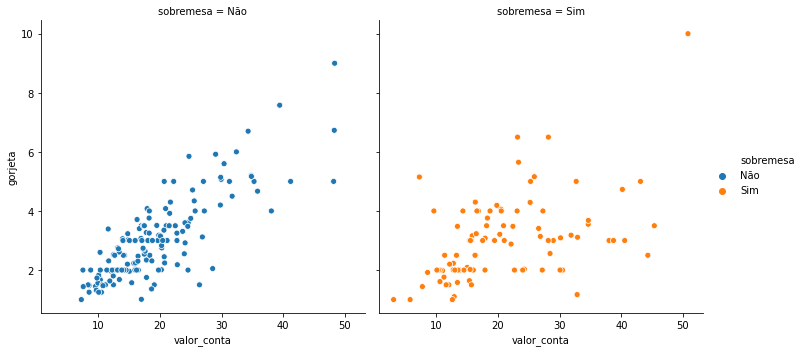

In [158]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=new_data)

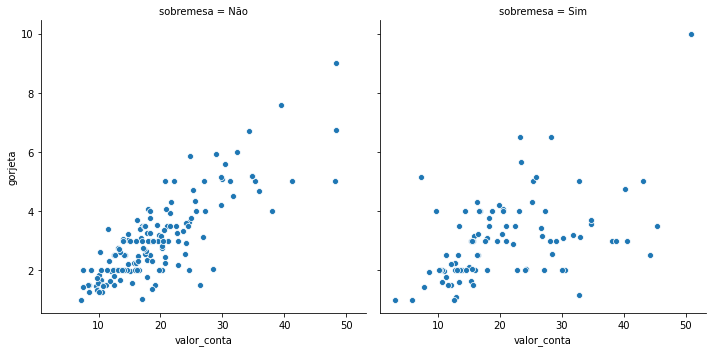

In [159]:
sns.relplot(x='valor_conta', y='gorjeta', col='sobremesa', data=new_data)

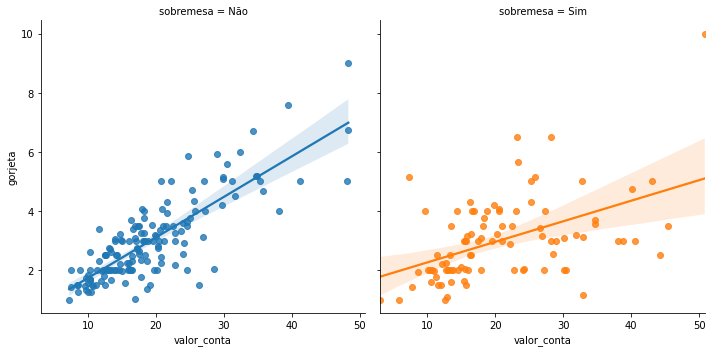

In [162]:
sns.lmplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=new_data)

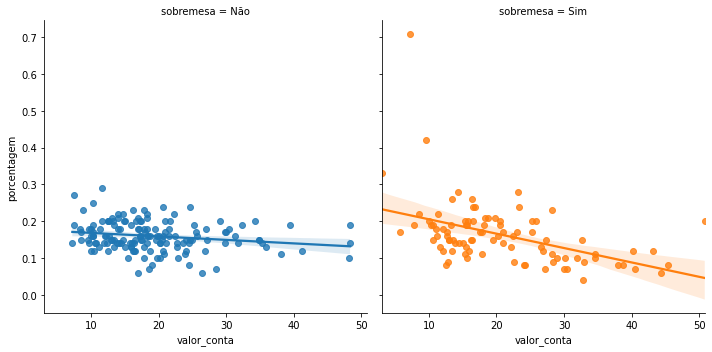

In [163]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=new_data)

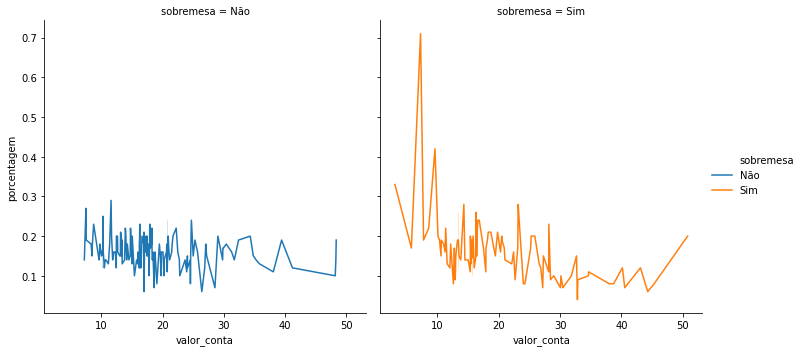

In [167]:
sns.relplot(x='valor_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=new_data)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [169]:
from scipy.stats import ranksums

In [172]:
sem_sobremesa = new_data.query('sobremesa == "Não"').porcentagem

In [173]:
com_sobremesa = new_data.query('sobremesa == "Sim"').porcentagem

In [217]:
r = ranksums(com_sobremesa, sem_sobremesa)
print(f'O valor do p-values: {r.pvalue}')

O valor do p-values: 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

## 3º Análise - Dia da semana

In [178]:
new_data.dia_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

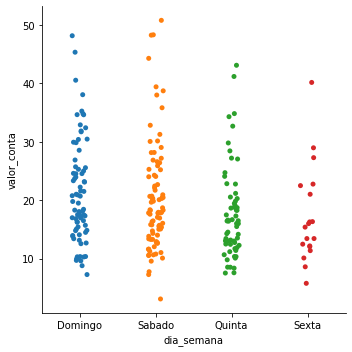

In [179]:
sns.catplot(x='dia_semana', y='valor_conta', data=new_data)

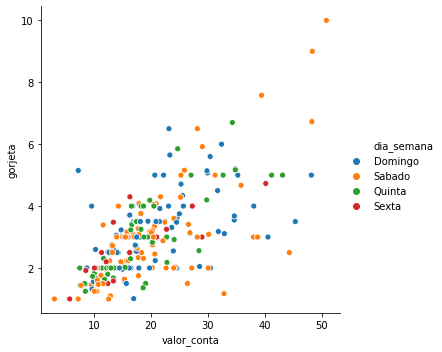

In [180]:
sns.relplot(x='valor_conta', y='gorjeta',hue='dia_semana' , data=new_data)

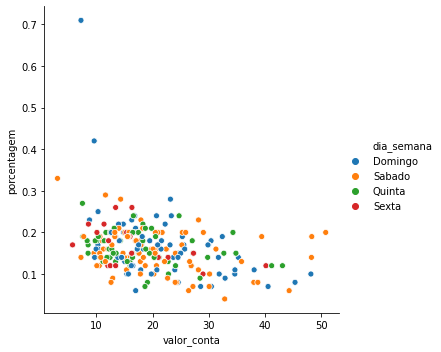

In [181]:
sns.relplot(x='valor_conta', y='porcentagem',hue='dia_semana' , data=new_data)

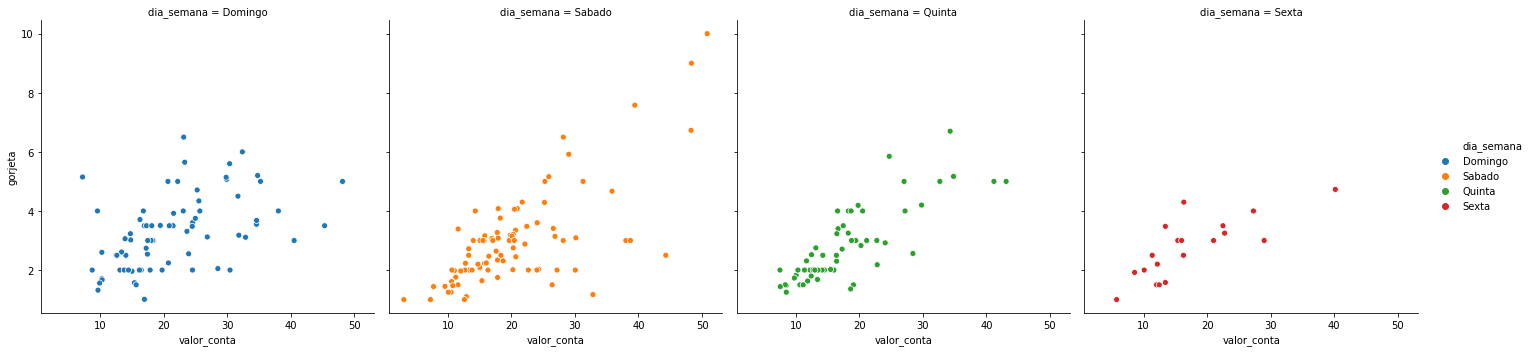

In [182]:
sns.relplot(x='valor_conta', y='gorjeta',hue='dia_semana',col='dia_semana', data=new_data)

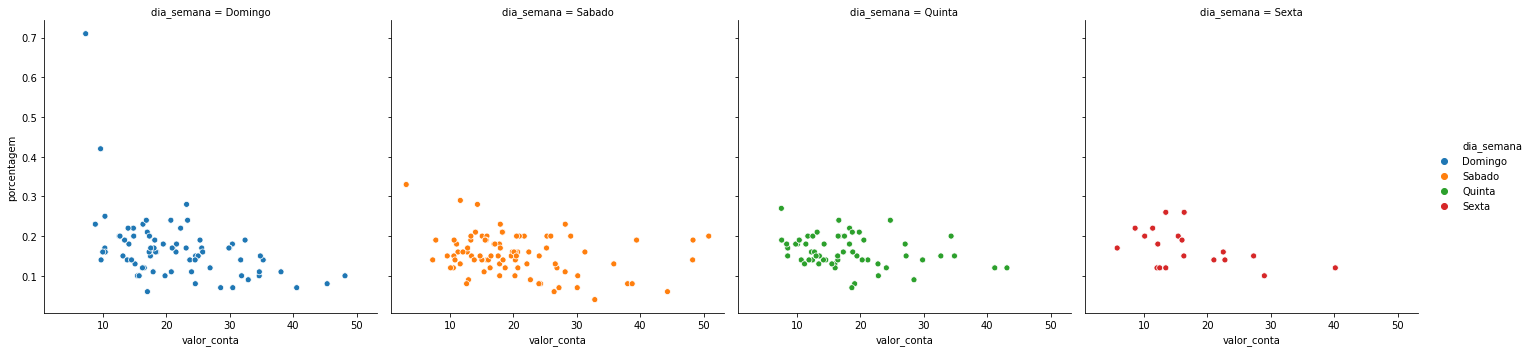

In [183]:
sns.relplot(x='valor_conta', y='porcentagem',hue='dia_semana',col='dia_semana', data=new_data)

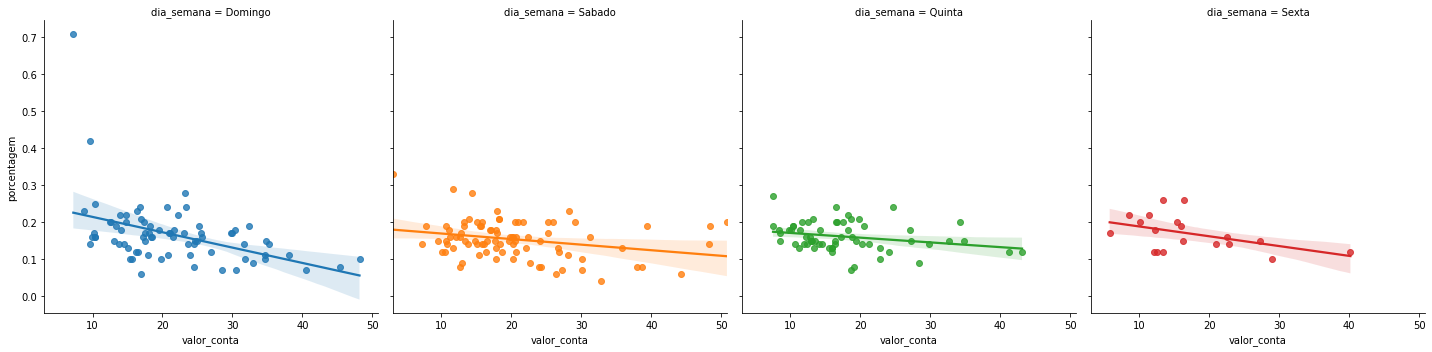

In [184]:
sns.lmplot(x='valor_conta', y='porcentagem',hue='dia_semana',col='dia_semana', data=new_data)

In [201]:
media_gorjeta = new_data.gorjeta.mean()
print(f'A média geral das gorjetas: R${round(media_gorjeta,2)}')

A média geral das gorjetas: R$3.0


In [203]:
new_data.groupby(['dia_semana']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [205]:
print('Frequência dos dias...')
new_data.dia_semana.value_counts()

Frequência dos dias...


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [213]:
conta_sabado = new_data.query('dia_semana == "Sabado"').valor_conta
conta_domingo = new_data.query('dia_semana == "Domingo"').valor_conta

In [216]:
r1 = ranksums(conta_sabado, conta_domingo)
print(f'O valor do p-values: {r1.pvalue}')

O valor do p-values: 0.3576728477868443


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

## 4º Análise - Almoço vs Jantar

In [218]:
new_data.head(2)

,valor_conta,gorjeta,sobremesa,dia_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


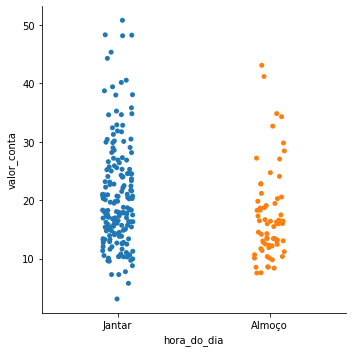

In [219]:
sns.catplot(x='hora_do_dia', y='valor_conta', data=new_data)

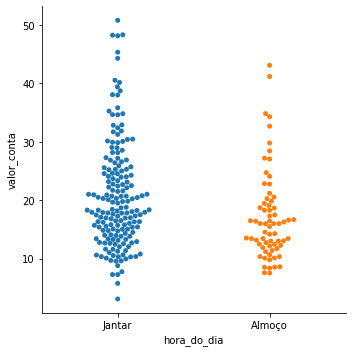

In [220]:
sns.catplot(x='hora_do_dia', y='valor_conta', kind='swarm', data=new_data)

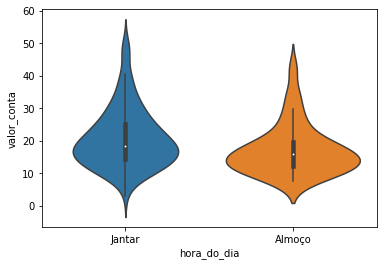

In [221]:
sns.violinplot(x='hora_do_dia', y='valor_conta', data=new_data)

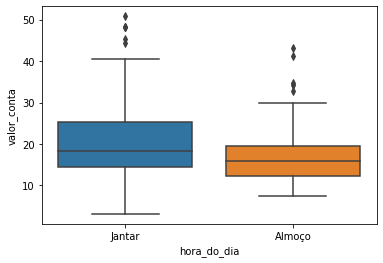

In [222]:
sns.boxplot(x='hora_do_dia', y='valor_conta', data=new_data)

In [229]:
almoco = new_data.query('hora_do_dia == "Almoço"').valor_conta

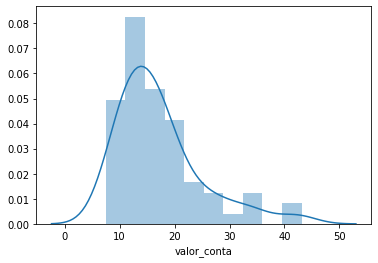

In [230]:
sns.distplot(almoco)

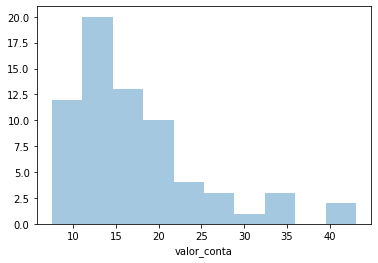

In [231]:
sns.distplot(almoco, kde=False)

In [232]:
jantar = new_data.query('hora_do_dia == "Jantar"').valor_conta

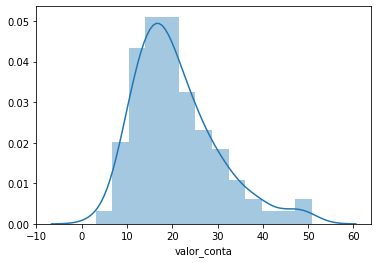

In [233]:
sns.distplot(jantar)

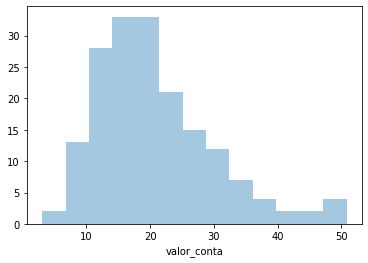

In [234]:
sns.distplot(jantar, kde=False)

In [238]:
new_data.groupby('hora_do_dia').mean()[['valor_conta','gorjeta','porcentagem']]

,valor_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no almoço e na jantar**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no almoço e na jantar**

In [240]:
r2 = ranksums(almoco, jantar)
print(f'O valor do p-values: {r2.pvalue}')

O valor do p-values: 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no almoço e no jantar**

## Teste de hipótese 3

In [244]:
p_almoco = new_data.query('hora_do_dia == "Almoço"').porcentagem
p_jantar = new_data.query('hora_do_dia == "Jantar"').porcentagem

**H<sup>null</sup>**

>**A distribuição da taxa da gorjetar é igual no almoço e na jantar**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjetar não é igual no almoço e na jantar**

In [246]:
r3 = ranksums(p_almoco, p_jantar)
print(f'O valor do p-values: {r3.pvalue}')

O valor do p-values: 0.2602493995587126


**H<sup>null</sup>**

>**A distribuição da taxa da gorjetar é igual no almoço e na jantar**